In [1]:
#Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np

In [2]:
#Import libraries and modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [3]:
from sklearn.linear_model import LogisticRegression

#Import scikit-learn module to split the dataset into train/ test sub datasets
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import plot_roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.metrics import classification_report

In [6]:
data = pd.read_csv('/Users/alexmcgraw/Documents/Adv_Predictive_Modeling/Final_Presentation/Processed data/finaldata_w_xy_and_dummies.csv')
data = data.drop(columns='Unnamed: 0')
data.shape

(17639, 54)

In [7]:
data.columns

Index(['gameId', 'playId', 'x', 'y', 'nflId', 'event', 'displayName',
       'frameId', 'targetNflId', 'Opp_Dist', 'closestOpp_Id', 'Team_Dist',
       'closestTeam_Id', 'QB_Dist', 'closestQB_Id', 'FootDist', 'quarter',
       'down', 'yardsToGo', 'defendersInTheBox', 'numberOfPassRushers',
       'absoluteYardlineNumber', 'passResult', 'penalty', 'offensePlayResult',
       'epa', 'playResult', 'isDefensivePI', 'height', 'weight', 'position_CB',
       'position_DB', 'position_DE', 'position_DT', 'position_FB',
       'position_HB', 'position_K', 'position_QB', 'position_RB',
       'position_TE', 'position_WR', 'route_ANGLE', 'route_CORNER',
       'route_CROSS', 'route_FLAT', 'route_GO', 'route_HITCH', 'route_IN',
       'route_OUT', 'route_POST', 'route_SCREEN', 'route_SLANT', 'route_WHEEL',
       'route_undefined'],
      dtype='object')

In [8]:
df = data[['passResult','quarter','down','yardsToGo','Opp_Dist','Team_Dist','QB_Dist','FootDist',\
           'defendersInTheBox','numberOfPassRushers','height','weight','position_CB', 'position_DB', \
           'position_DE', 'position_DT','position_FB', 'position_HB', 'position_K', 'position_QB', \
           'position_RB', 'position_TE', 'position_WR', 'route_ANGLE','route_CORNER', 'route_CROSS', \
           'route_FLAT', 'route_GO', 'route_HITCH', 'route_IN', 'route_OUT', 'route_POST', \
           'route_SCREEN', 'route_SLANT','route_WHEEL',]]
df.shape

(17639, 35)

In [9]:
print(df.dtypes)

passResult               int64
quarter                  int64
down                     int64
yardsToGo                int64
Opp_Dist               float64
Team_Dist              float64
QB_Dist                float64
FootDist               float64
defendersInTheBox      float64
numberOfPassRushers    float64
height                  object
weight                   int64
position_CB              int64
position_DB              int64
position_DE              int64
position_DT              int64
position_FB              int64
position_HB              int64
position_K               int64
position_QB              int64
position_RB              int64
position_TE              int64
position_WR              int64
route_ANGLE              int64
route_CORNER             int64
route_CROSS              int64
route_FLAT               int64
route_GO                 int64
route_HITCH              int64
route_IN                 int64
route_OUT                int64
route_POST               int64
route_SC

In [11]:
print(df.head(5))


   passResult  quarter  down  yardsToGo  Opp_Dist  Team_Dist    QB_Dist  \
0           1        1     1         15  7.472858   8.001050  17.474132   
1           1        1     3         10  4.070344   3.473385   8.875207   
2           0        1     1         10  3.571792  15.274980  15.274980   
3           1        2     2          8  6.582439   7.361012  14.690722   
4           1        2     1         10  3.500700   2.465461  13.051544   

    FootDist  defendersInTheBox  numberOfPassRushers  ... route_CROSS  \
0  17.335126                7.0                  4.0  ...           0   
1   8.109383                6.0                  5.0  ...           0   
2  15.449926                8.0                  4.0  ...           0   
3  14.738826                7.0                  4.0  ...           0   
4  12.255338                6.0                  4.0  ...           0   

   route_FLAT  route_GO  route_HITCH  route_IN  route_OUT  route_POST  \
0           0         0            1 

In [12]:
print(df.describe())

         passResult       quarter          down     yardsToGo      Opp_Dist  \
count  17639.000000  17639.000000  17639.000000  17639.000000  17639.000000   
mean       0.614774      2.581552      1.914791      8.928000      5.703248   
std        0.486662      1.126696      0.843017      4.000344      2.780204   
min        0.000000      1.000000      1.000000      1.000000      0.560089   
25%        0.000000      2.000000      1.000000      6.000000      3.320768   
50%        1.000000      3.000000      2.000000     10.000000      5.586054   
75%        1.000000      4.000000      3.000000     10.000000      7.532689   
max        1.000000      5.000000      4.000000     41.000000     24.448290   

          Team_Dist       QB_Dist      FootDist  defendersInTheBox  \
count  17639.000000  17626.000000  17639.000000       17624.000000   
mean       5.460189      9.075063      9.559468           6.032626   
std        3.353052      5.471178      5.099870           1.008285   
min     

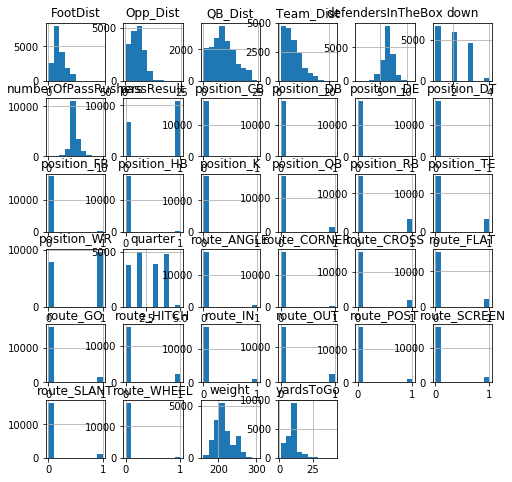

In [13]:
df.hist(figsize=(8,8))
pyplot.show()

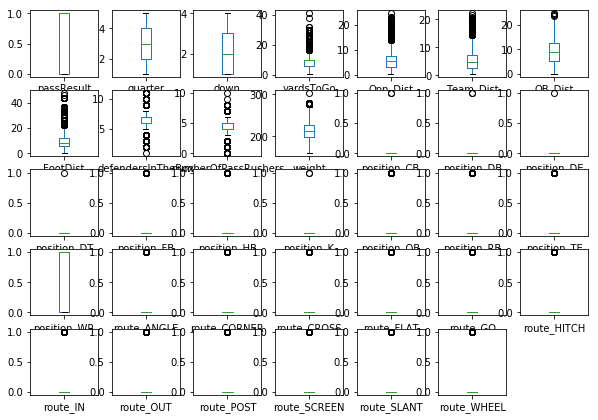

In [14]:
df.plot(kind='box', subplots=True, layout=(7,7), sharex=False, figsize=(10,10))
pyplot.show() 


In [10]:
# count the number of NaN values in each column

df.dropna(subset=['QB_Dist', 'defendersInTheBox'], inplace=True)

/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
height_dict = {'5-10':70,'6-5':77, '6-4':76, '6-3':75, '6-2':74, '6-1':73, '6-0':72, '5-11':71, \
               '5-9':69, '5-8':68, '5-7':67, '5-6':66,'6-7':79,'6-6':78,'64':64,'65':65,'66':66,'67':67,'68':68, \
              '69':69,'70':70,'71':71,'72':72,'73':73,'74':74,'75':75,'76':76,'77':77,'78':78,'79':79,'80':80}
df['height'] = data['height'].map(height_dict)

/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
# Split data into train, validation, test
X = df.drop(['passResult'], axis=1)
Y = df['passResult']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=42)


In [13]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

model = LogisticRegression()

model.fit(X_train, y_train)

predicted = model.predict(X_test)

report = classification_report(y_test, predicted)

#print(report)
f1_score(y_test, predicted)

#plot_roc_curve(model, X_test, y_test)
#accuracy_score(y_test, predicted)
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7306786939643651

In [22]:
result = model.score(X_test, Y_test)

print(("Accuracy: %.3f%%") % (result*100.0))


Accuracy: 71.654%


In [14]:
from sklearn.metrics import accuracy_score
1 - accuracy_score(y_test, predicted)

0.28029959146618244

In [60]:
n_splits = 10

seed = 7

kfold = KFold(n_splits, random_state=seed)

scoring = 'accuracy'

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOT

Accuracy: 0.717 (0.019)


/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
